In [1]:
import numpy as np
from PySDM.physics.constants import si
from simulation import Simulation
from PySDM import Formulae
from settings import Settings
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
formulae = Formulae(
            particle_shape_and_density="MixedPhaseSpheres",
        )

In [3]:
"""  basic setup for homogeneous freezing of pure-liquid droplets """
"""
Ensemble for:
1. n_sd
2. w
3. r & n_c
4. use diffrent hom. nucleation rates
Questions:
- where to store backend
- need to restart kernel if change in files outside notebook
"""

n_sd = 100
number_concentration_droplets = 850 / si.cm**3
mean_radius_dry_aerosol= 15 * si.nanometer
updraft = 1 * si.meter / si.second
initial_temperature =  formulae.trivia.C2K( -25. )
time_step = 0.1 * si.second

common = {  "n_sd": n_sd,
    "w_updraft": updraft,
    "T0":  initial_temperature,
    "dt": time_step,
    "N_dv_droplet_distribution": number_concentration_droplets,
    "r_mean_droplet_distribution": mean_radius_dry_aerosol,
    "type_droplet_distribution": "monodisperse",
    "RH_0":0.995,
    "condensation_enable": True,
    "deposition_enable": False,
            }

hom_freezing_types = (  "threshold", "Koop_Correction", "KoopMurray2016", "Koop2000")
simulations = []


for hom_freezing_type in hom_freezing_types:
    setting_dict = {
        **common,
        "hom_freezing": hom_freezing_type,
        }
    simulation = { "settings": setting_dict, }
    simulations.append( simulation )
    print( simulation  )

{'settings': {'n_sd': 100, 'w_updraft': 1.0, 'T0': 248.14999999999998, 'dt': 0.1, 'N_dv_droplet_distribution': 849999999.9999999, 'r_mean_droplet_distribution': 1.5000000000000002e-08, 'type_droplet_distribution': 'monodisperse', 'RH_0': 0.995, 'condensation_enable': True, 'deposition_enable': False, 'hom_freezing': 'threshold'}}
{'settings': {'n_sd': 100, 'w_updraft': 1.0, 'T0': 248.14999999999998, 'dt': 0.1, 'N_dv_droplet_distribution': 849999999.9999999, 'r_mean_droplet_distribution': 1.5000000000000002e-08, 'type_droplet_distribution': 'monodisperse', 'RH_0': 0.995, 'condensation_enable': True, 'deposition_enable': False, 'hom_freezing': 'Koop_Correction'}}
{'settings': {'n_sd': 100, 'w_updraft': 1.0, 'T0': 248.14999999999998, 'dt': 0.1, 'N_dv_droplet_distribution': 849999999.9999999, 'r_mean_droplet_distribution': 1.5000000000000002e-08, 'type_droplet_distribution': 'monodisperse', 'RH_0': 0.995, 'condensation_enable': True, 'deposition_enable': False, 'hom_freezing': 'KoopMurray2

In [4]:
for simulation in simulations:
    setting = Settings(**simulation["settings"])
    model = Simulation(setting)
    simulation["output"] = model.run()

Setting up simualtion with threshold
Starting simulation...
break due to LWC
Setting up simualtion with Koop_Correction
Starting simulation...
break due to LWC
Setting up simualtion with KoopMurray2016
Starting simulation...
break due to LWC
Setting up simualtion with Koop2000
Starting simulation...
break due to LWC


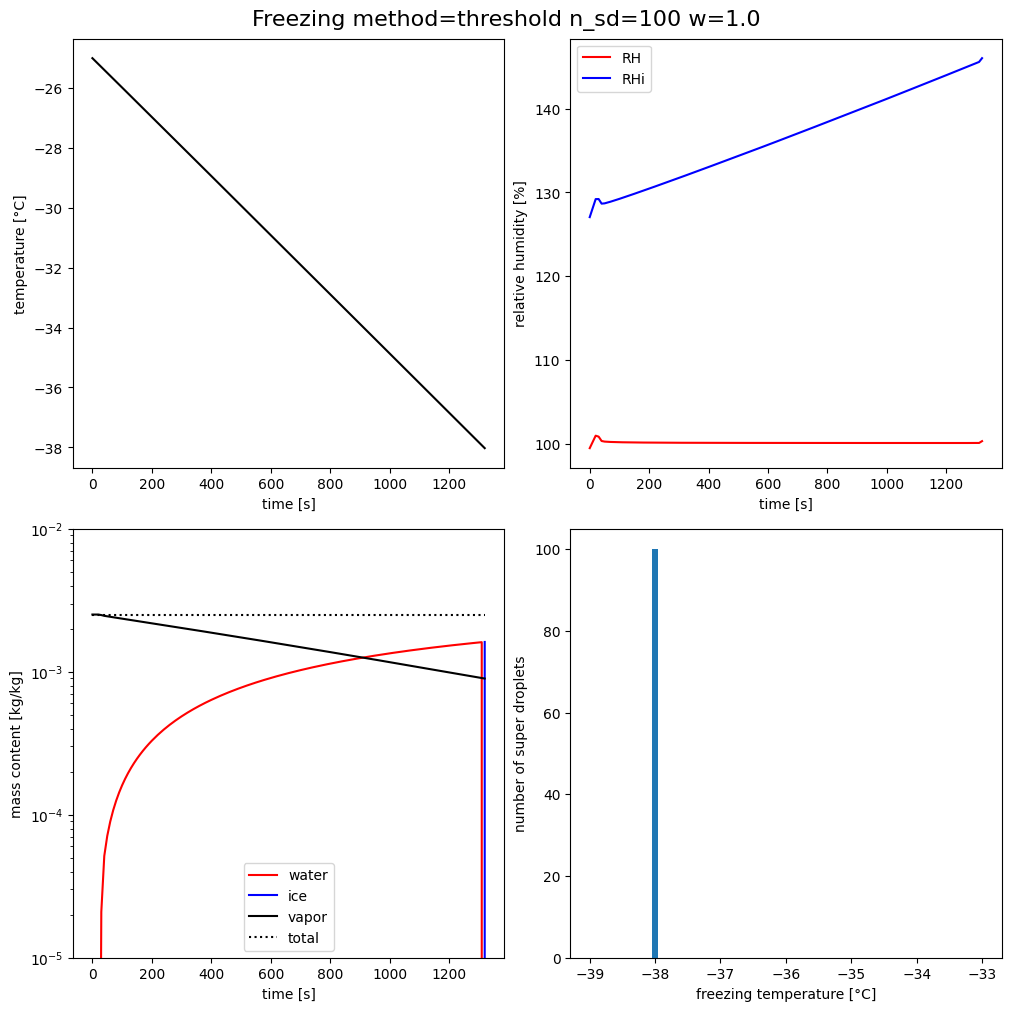

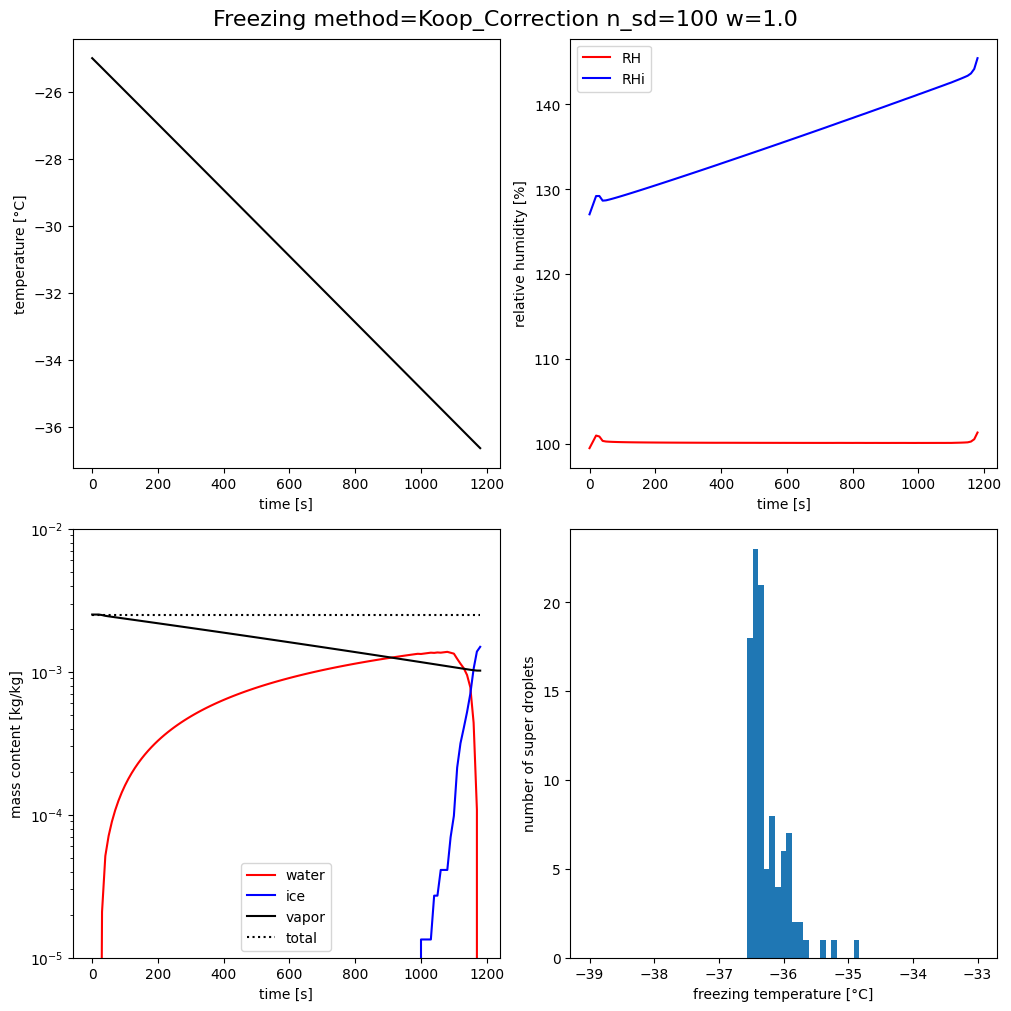

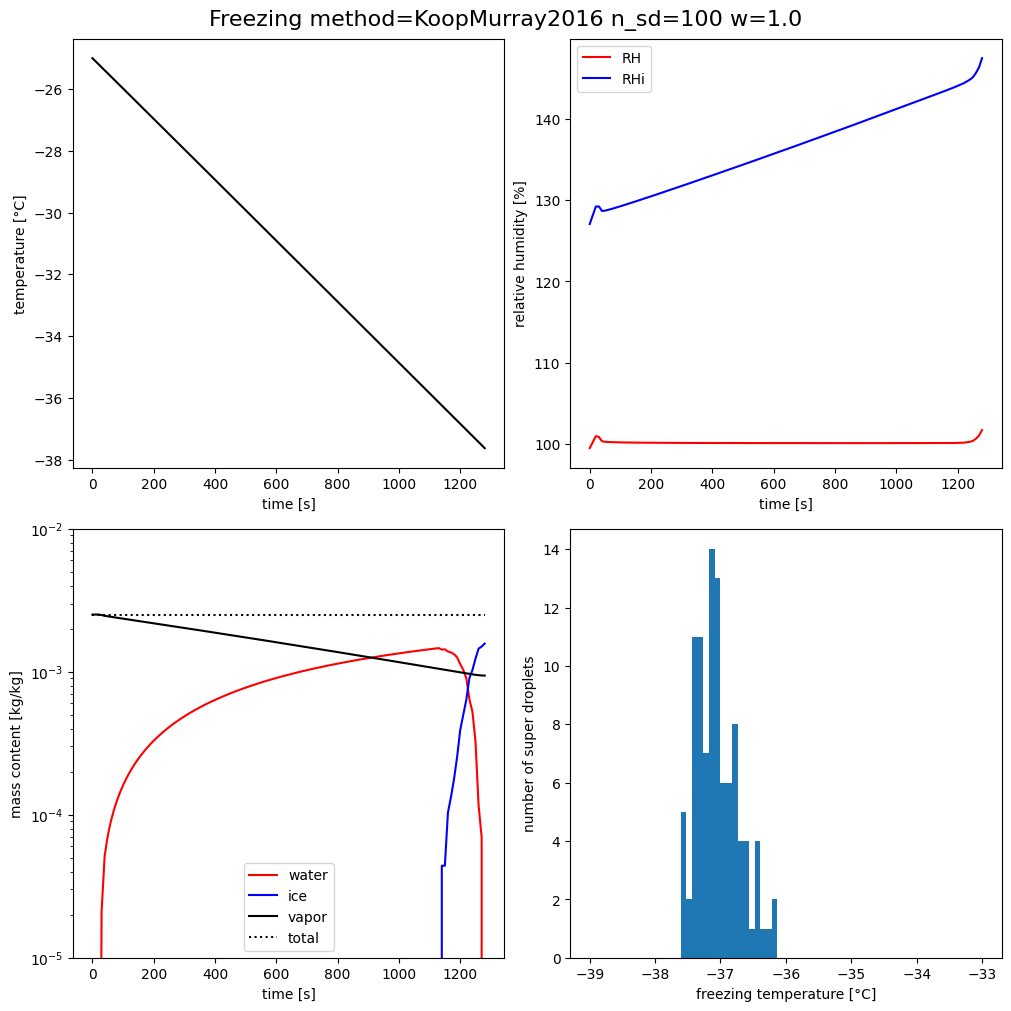

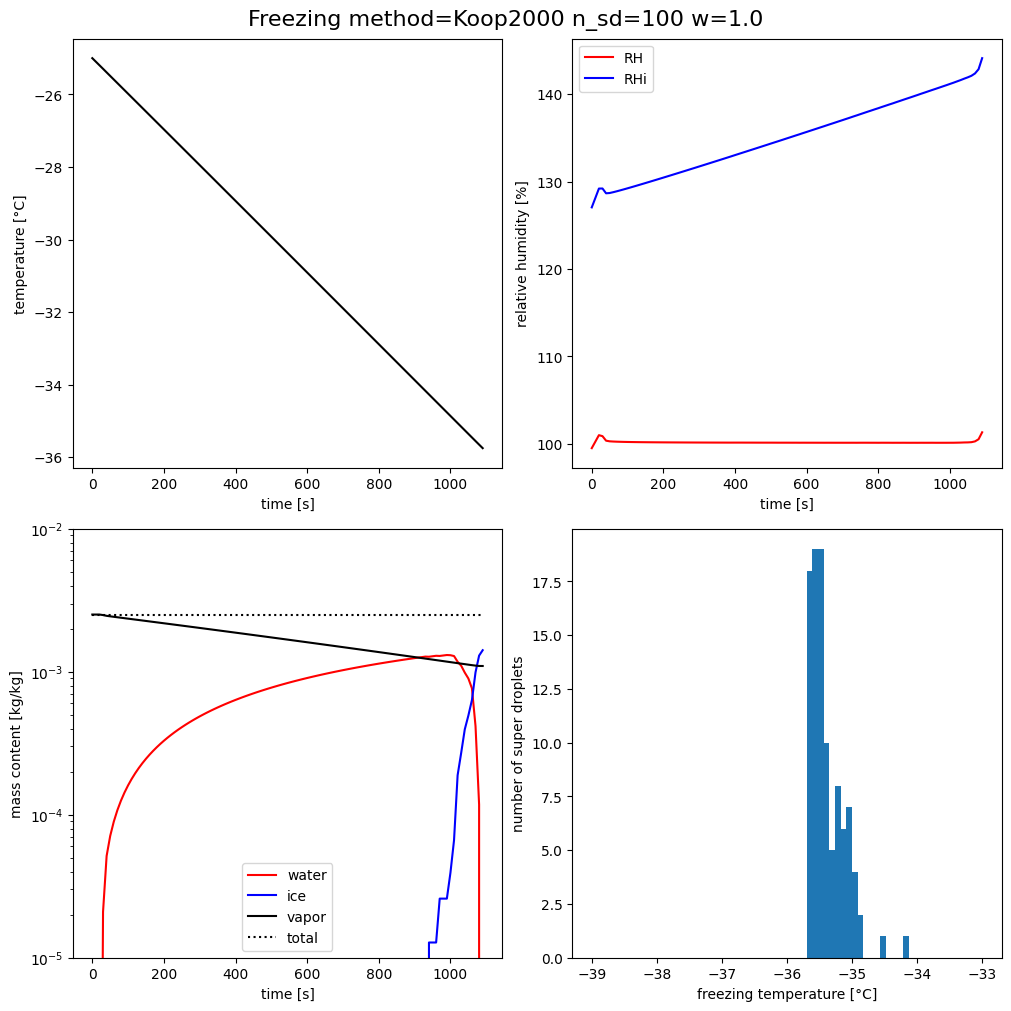

In [8]:
def plot_simulation(simulation):

    output = simulation["output"]
    time = output["t"]
    T = np.asarray(output["T"])
    RH = np.asarray(output["RH"])
    RHi = np.asarray(output["RHi"])
    qc = np.asarray(output["LWC"])
    qi = np.asarray(output["IWC"])
    qv = np.asarray(output["qv"])
    T_frz = np.asarray(output["T_frz"][-1])
    qt = qc + qv + qi

    fig, axs = pyplot.subplots(2, 2, figsize=(10, 10), sharex=False, constrained_layout=True)

    title = ("Freezing method="+simulation["settings"]["hom_freezing"]
             + " n_sd="+str(simulation["settings"]["n_sd"])
             + " w="+str(simulation["settings"]["w_updraft"]))
    fig.suptitle(title, fontsize=16)

    """ Temperture profile """
    ax =axs[0,0]
    ax.plot(
        time, formulae.trivia.K2C(T), color="black", linestyle="-"
    )
    ax.set_xlabel("time [s]")
    ax.set_ylabel("temperature [°C]")

    """ Relative humidity profile """
    ax =axs[0,1]
    ax.plot(
        time, RH, color="red", linestyle="-", label="RH"
    )
    ax.plot(
        time, RHi, color="blue", linestyle="-", label="RHi"
    )
    ax.set_xlabel("time [s]")
    ax.set_ylabel("relative humidity [%]")
    ax.legend()

    """ Mass content """
    ax =axs[1,0]
    ax.plot(
        time, qc, color="red", linestyle="-", label="water"
    )
    ax.plot(
        time, qi, color="blue", linestyle="-", label="ice"
    )
    ax.plot(
        time, qv, color="black", linestyle="-", label="vapor"
    )
    ax.plot(
        time, qt, color="black", linestyle="dotted", label="total"
    )
    ax.set_yscale('log')
    ax.set_ylim(1e-5,1e-2)
    ax.set_xlabel("time [s]")
    ax.set_ylabel("mass content [kg/kg]")
    ax.legend()

    """ Freezing temperatures """
    ax = axs[1,1]
    T_frz_bins = np.linspace(-39,-33,num=70, endpoint=True)
    plt.hist( formulae.trivia.K2C(T_frz), bins=T_frz_bins, density=False)
    ax.set_xlabel("freezing temperature [°C]")
    ax.set_ylabel("number of super droplets")

for simulation in simulations:
    plot_simulation(simulation)